# Deep_Learning_from_Scratch_1 - part4

#### 딥러닝의 기본적인 내용을 정리하였습니다. 밑바닥부터 시작하는 딥러닝(사이토 고키 지음)을 참고하였습니다. 

## 5. 오차역전파법
#### - 오차역전파법 : 가중치 매개변수의 기울기를 효율적으로 계산하는 방법

### 5.1 계산 그래프
#### - 계산 그래프 : 계산 과정을 그래프로 표현
#### 5.1.1 계산 그래프로 풀다.
#### 순전파 : 계산 그래프의 출발점부터 종착점으로의 전파
#### 역전파 : 순전파의 반대 방향의 전파

#### 5.1.2 국소적 계산
#### - 계산 그래프의 각 노드는 자신과 관련한 계산 외에는 신경쓸 것이 없다.

#### 5.1.3 왜 계산 그래프로 푸는가
#### - 계산 그래프를 사용하는 가장 큰 이유는 역전파를 통해 '미분'을 효율적으로 계산할 수 있기때문이다. 

### 5.2 연쇄법칙
#### - 국소적 미분을 전달하는 원리는 연쇄법칙을 따른다.
#### 5.2.1 계산 그래프의 역전파 
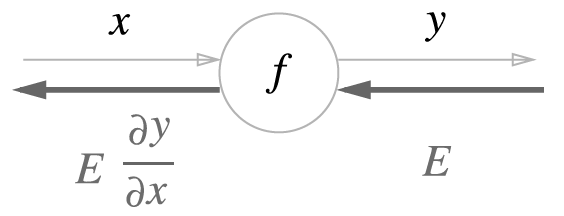
#### 5.2.2 연쇄법칙이란?
#### - 합성 함수의 미분은 합성 함수를 구성하는 각 함수의 미분의 곱으로 나타낼 수 있다.
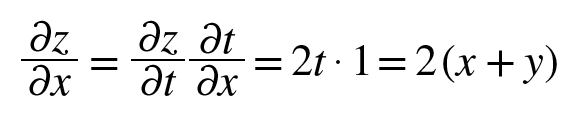
#### 5.2.3 연쇄법칙과 계산 그래프
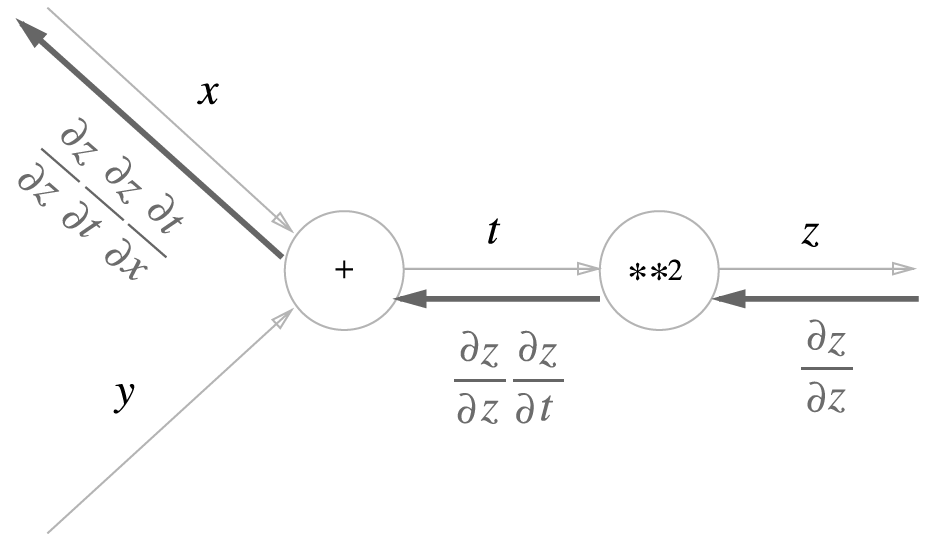
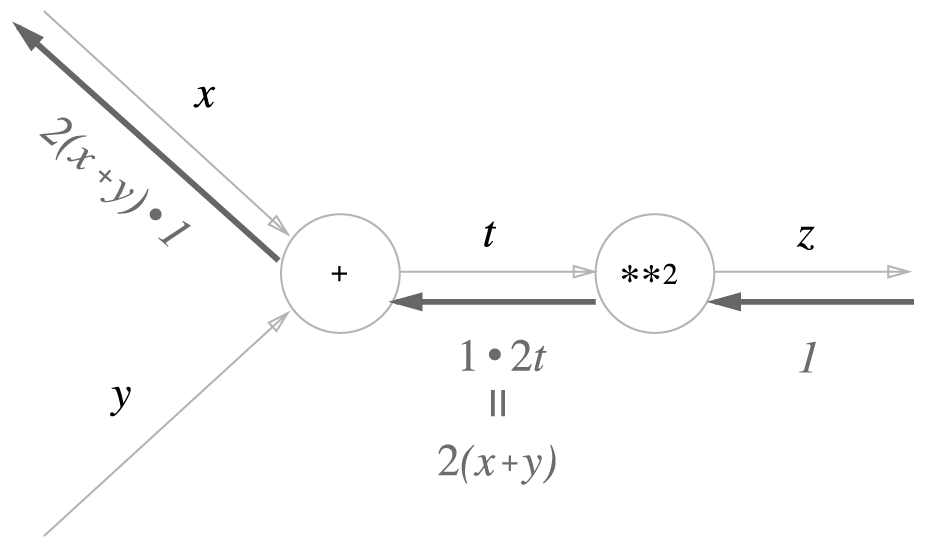

### 5.3 역전파
#### 5.3.1 덧셈 노드의 역전파
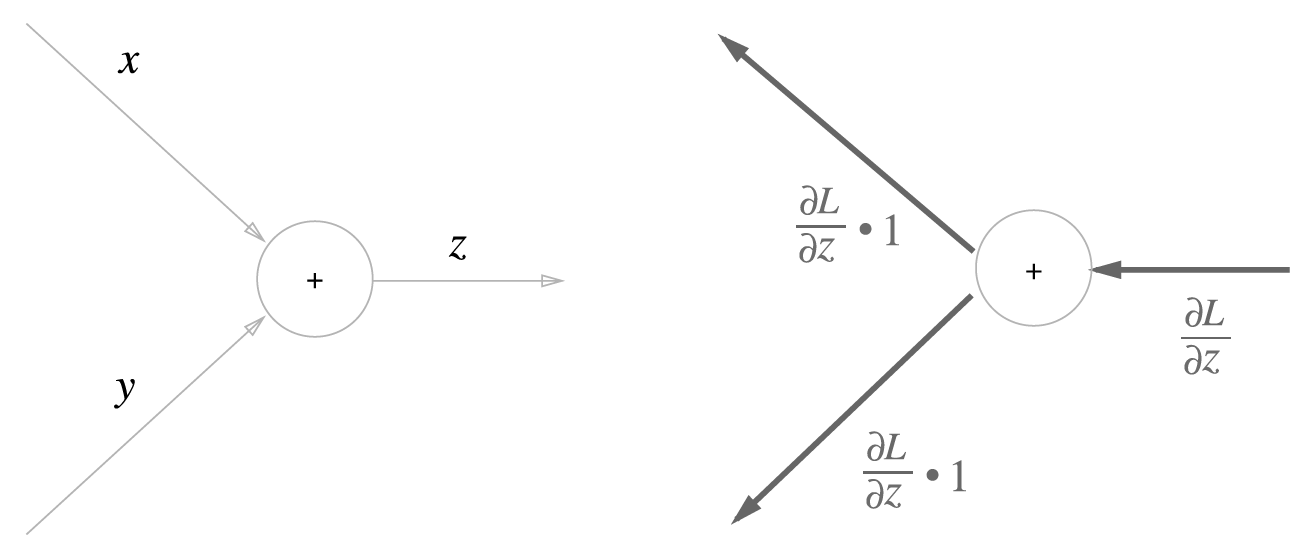
#### - 덧셈 노드 역전파는 입력 신호를 다음 노드로 출력한 뿐이다.
#### 5.3.2 곱셈 노드의 역전파
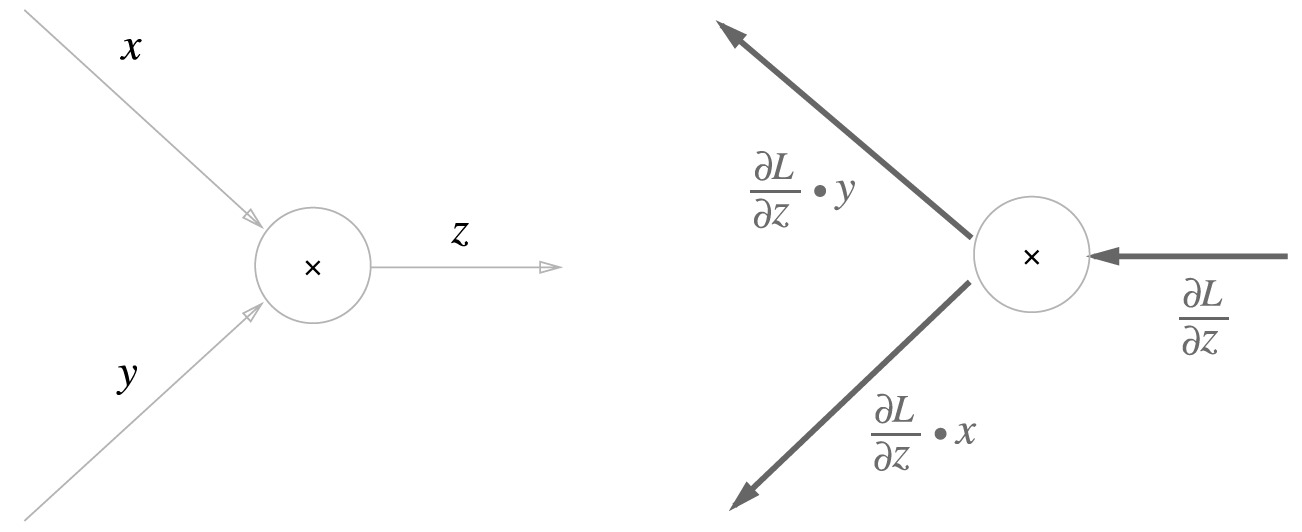
#### - 곱셈 노드 역전파는 상류의 값에 순전파 때의 입력 신호들을 '서로 바꾼 값'을 곱해서 출력

### 5.4 단순한 계층 구현하기
#### 5.4.1 곱셈 계층

In [5]:
class MulLayer:
    def __init__(self):
        self.x = None
        self.y = None
    
    def forward(self, x,y):
        self.x = x
        self.y = y
        out = x*y
        return out
    
    def backward(self, dout):
        dx = dout * self.y
        dy = dout * self.x
        
        return dx, dy

apple = 100
apple_num = 2
tax = 1.1

mul_apple_layer = MulLayer()
mul_tax_layer = MulLayer()

apple_price = mul_apple_layer.forward(apple, apple_num)
price = mul_tax_layer.forward(apple_price, tax)

print(price)

dprice = 1
dapple_price, dtax = mul_tax_layer.backward(dprice)
dapple, dapple_num = mul_apple_layer.backward(dapple_price)

print(dapple, dapple_num, dtax)

220.00000000000003
2.2 110.00000000000001 200


#### 5.4.2 덧셈 계층

In [6]:
class AddLayer:
    def __init__(self):
        pass
    
    def forward(self, x, y):
        out = x+y
        return out
    
    def backward(self, dout):
        dx = dout * 1
        dy = dout * 1
        return dx, dy
    
apple = 100
apple_num = 2
orange = 150
oragne_num = 3
tax = 1.1

mul_apple_layer = MulLayer()
mul_orange_layer = MulLayer()
add_apple_orange_layer = AddLayer()
mul_tax_layer = MulLayer()

apple_price = mul_apple_layer.forward(apple, apple_num)
orange_price = mul_orange_layer.forward(orange, oragne_num)
all_price = add_apple_orange_layer.forward(apple_price, orange_price)
price = mul_tax_layer.forward(all_price, tax)

dprice = 1
dall_price, dtax = mul_tax_layer.backward(dprice)
dapple_price, dorange_price = add_apple_orange_layer.backward(dall_price)
dorange, dorange_num = mul_orange_layer.backward(dorange_price)
dapple, daaple_num = mul_apple_layer.backward(dapple_price)

print(price)
print(daaple_num, dapple, dorange, dorange_num, dtax)

715.0000000000001
110.00000000000001 2.2 3.3000000000000003 165.0 650


### 5.5 활성화 함수 계층 구현하기
#### 5.5.1 ReLU 계층
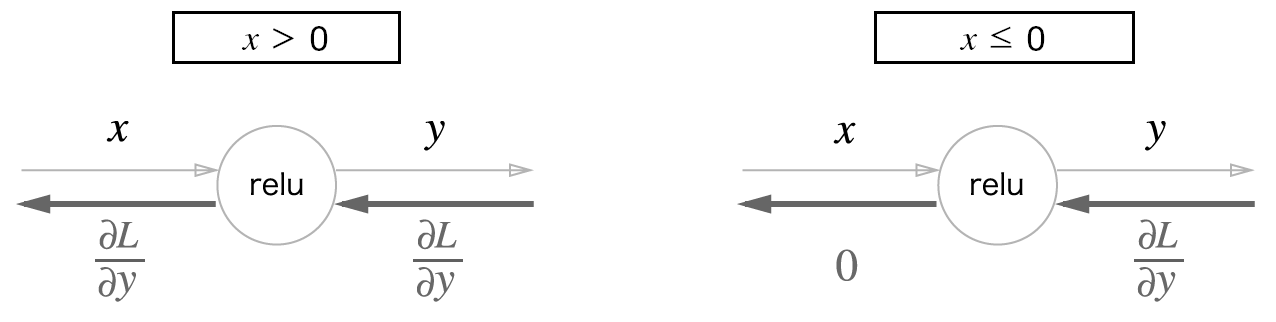

In [7]:
class Relu:
    def __init__(self):
        self.mask = None
        
    def forward(self, x):
        self.mask = (x <= 0)
        out = x.copy()
        out[self.mask] = 0
        
        return out
    
    def backward(self, dout):
        dout[self.mask] = 0
        dx = dout
        
        return dx

import numpy as np
x = np.array([[1.0, -0.5], [-2.0, 3.0]])
print(x)

mask = (x <=0)
print(mask)

[[ 1.  -0.5]
 [-2.   3. ]]
[[False  True]
 [ True False]]


#### 5.5.2 Sigmoid 계층
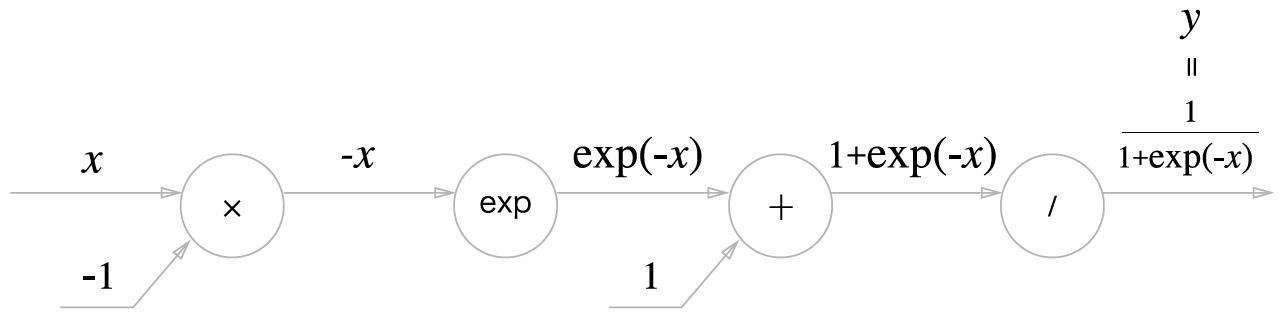
#### - '/' 노드의 역전파는 상류의 값에 순전파의 출력을 제곱한 후 마이너스를 붙인값을 출력
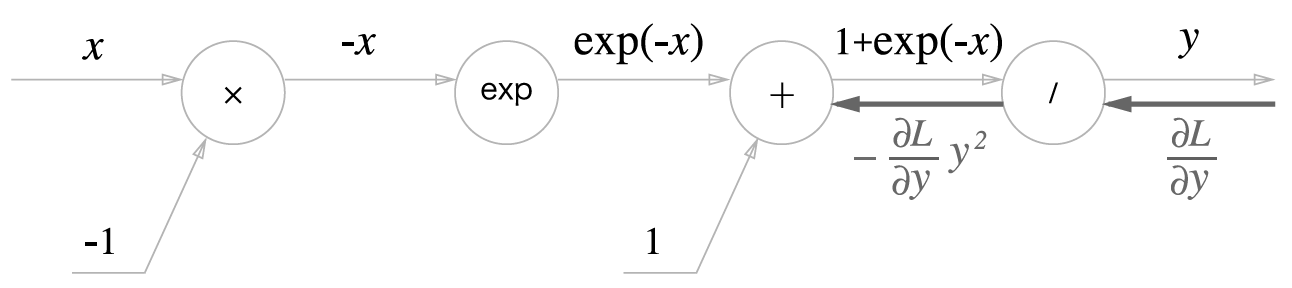
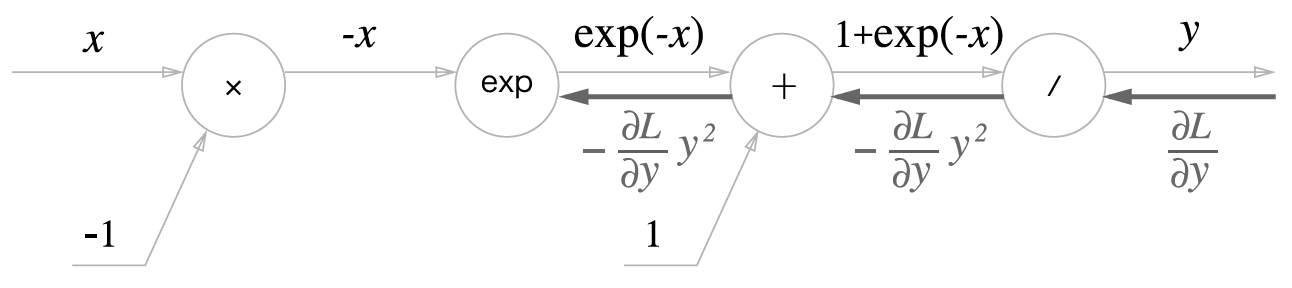
#### - 'exp' 노드의 역전파는 상류의 값에 순전파의 출력을 곱해 하류로 전파
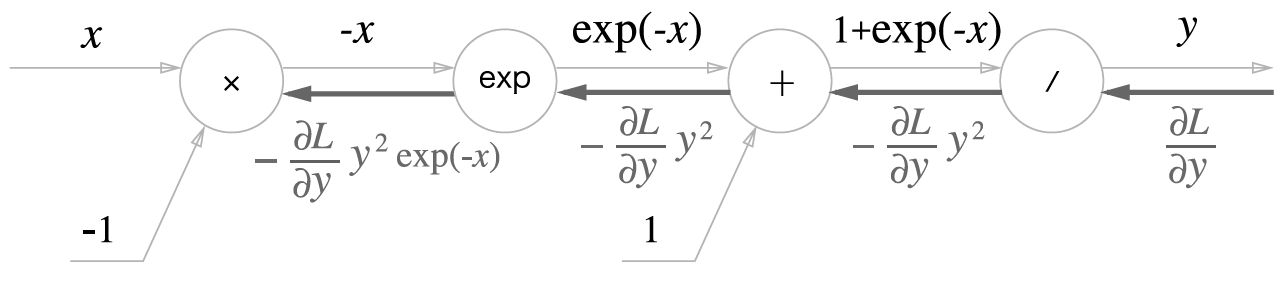
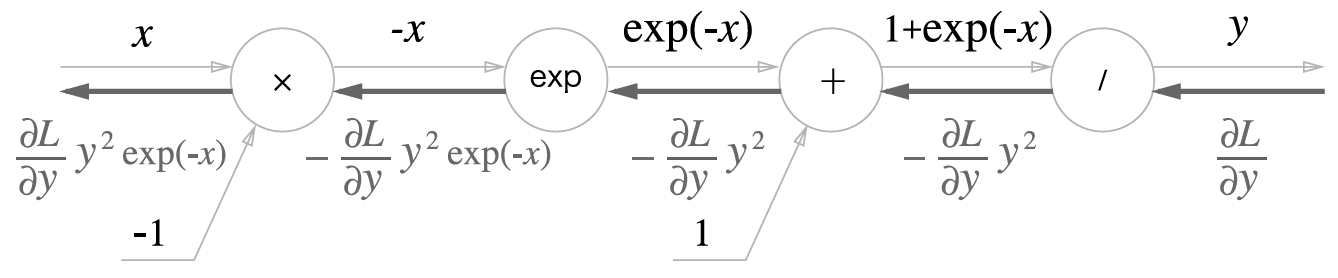
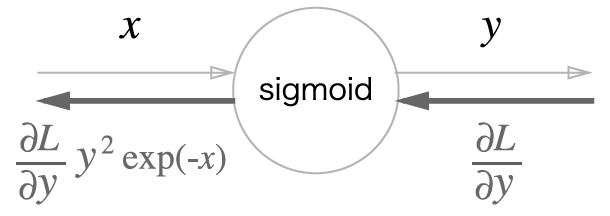
#### - Sigmoid 계층의 역전파는 순전파의 출력 만으로 계산할 수 있다.
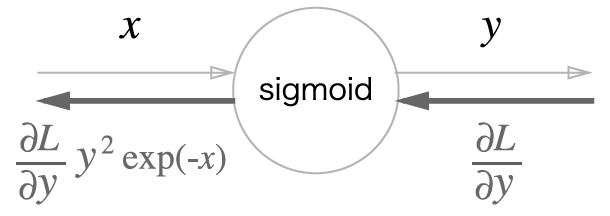
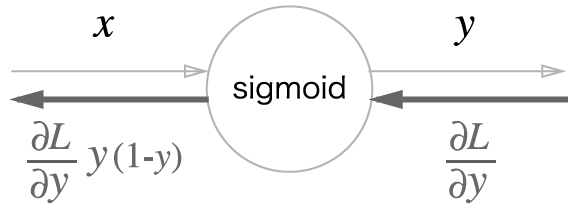

In [8]:
class Sigmoid:
    def __init__(self):
        self.out = None
    
    def forward(self, x):
        out = 1 / (1 + np.exp(-x))
        self.out = out
        
        return out
    
    def backward(self, dout):
        dx = dout * (1.0 - self.out) * self.out
        
        return dx

### 5.6 Affine / Softmax 계층 구현하기
#### 5.6.1 Affine 계층
#### - Affine 변환 : 기하학에서의 행렬의 곱
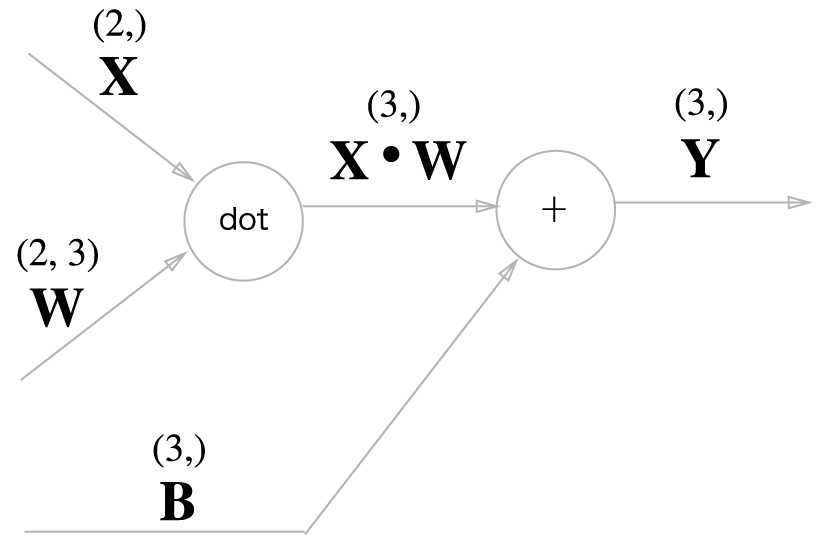
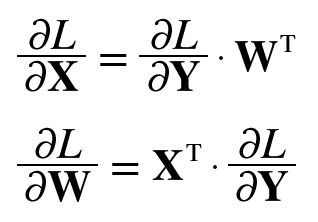
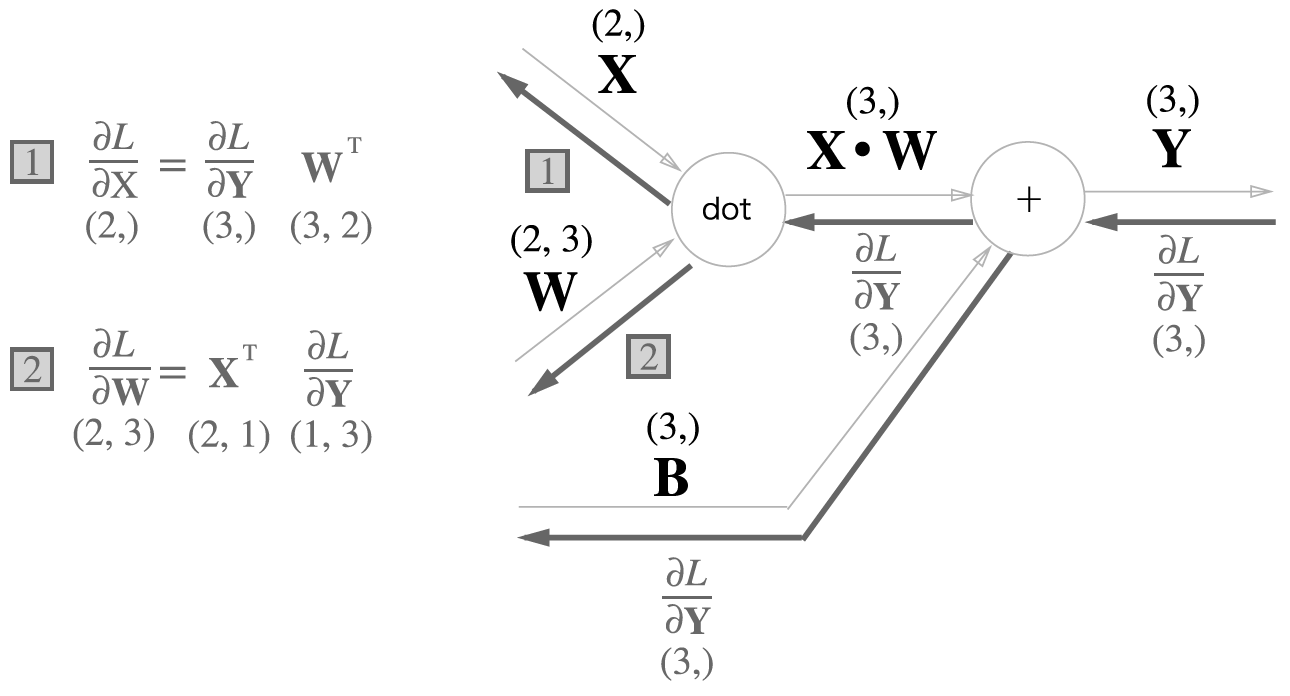

#### 5.6.2 배치용 Affine 계층
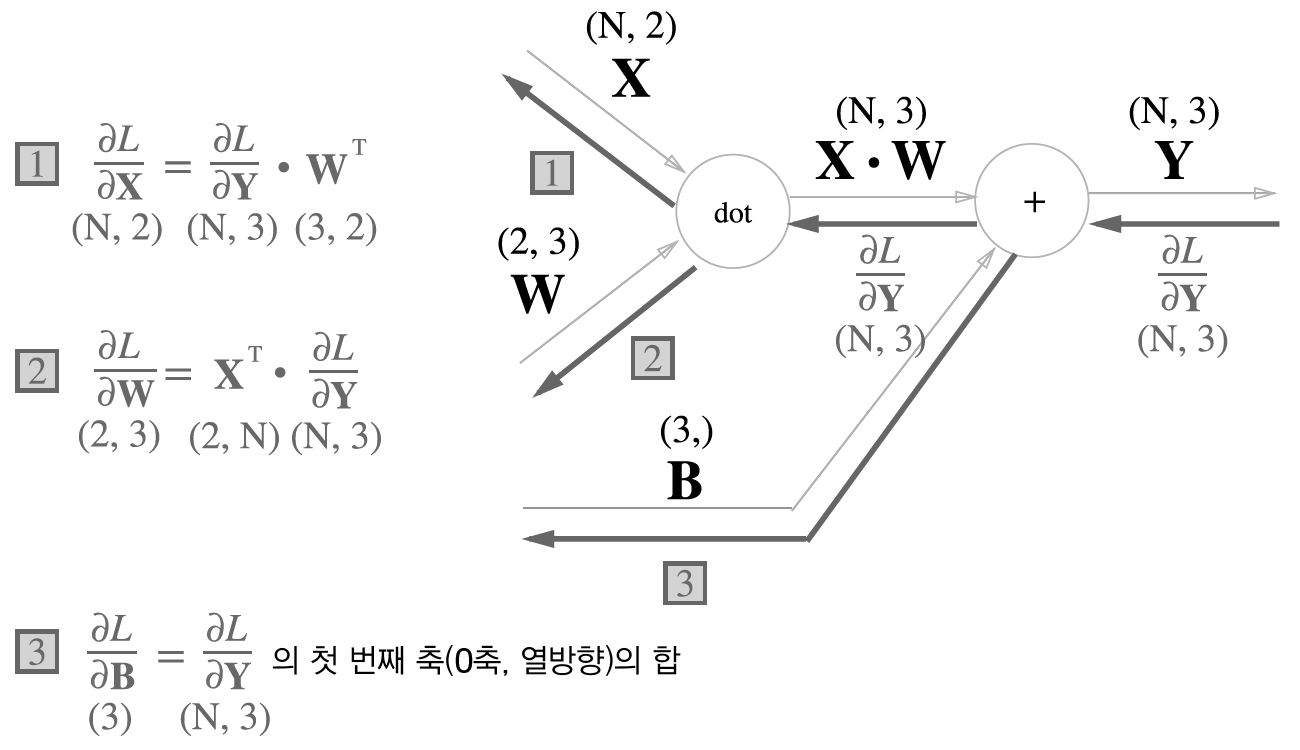
#### - 순전파의 편향 덧셈은 각각의 데이터에 더해진다. 따라서 역전파 때는 각 데이터의 역전파 값이 편향의 원소에 모여야 한다.

In [10]:
class Affine:
    def __init__(self, W, b):
        self.W = W
        self.b = b
        self.x = None
        self.dW = None
        self.db = None
        
    def forward(self, x):
        self.x = x
        out = np.dot(x, self.W) +self.b
        
        return out
    
    def backward(self, dout):
        dx = np.dot(dout, self.W.T)
        self.dW = np.dot(self.x.T, dout)
        self.db = np.sum(dout, axis =0)
        
        return dx

#### 5.6.3 Softmax-with-Loss 계층
#### - 학습을 할 때는 softmax를 사용하지만 추론을 할 때는 입력값이 가장 큰 값을 그대로 주면되기 때문에 따로 softmax를 사용하지 않는다.
#### - softmax_with_loss = softmax + cross_entropy_loss
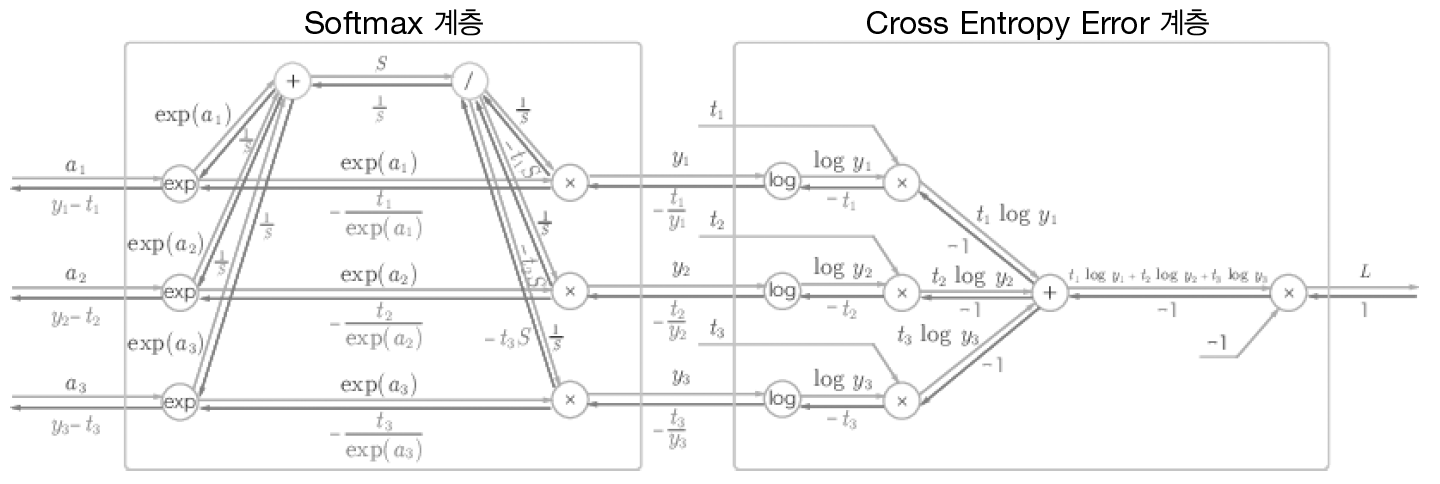
#### - Softmax 계층의 출력과 정답 레이블의 차분을 역전파의 결과로 갖는다.
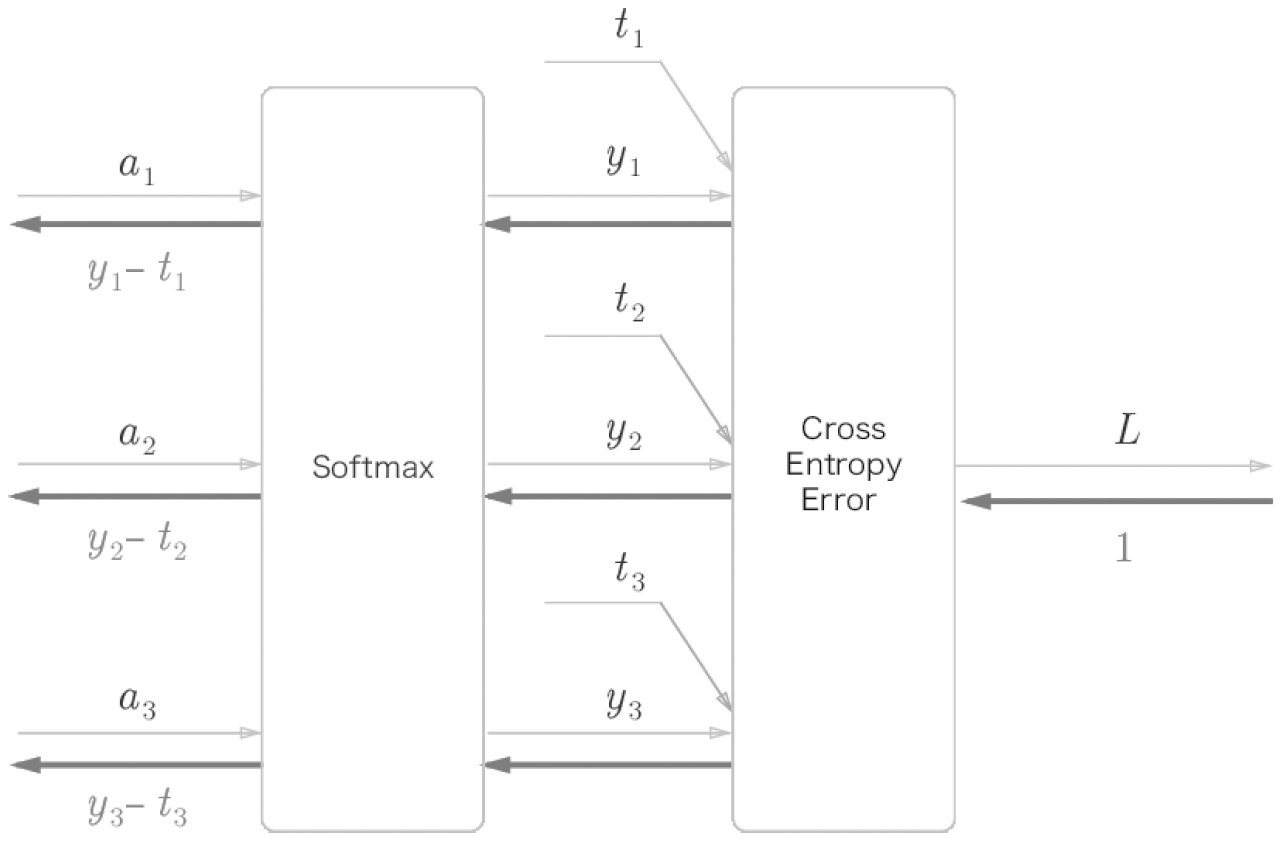
#### - 교차 엔트로피 오차라는 함수가 일부러 소프트맥스 함수와 합쳤을 때 역전파가 깔끔하게 떨어지도록 설계된 것이다.
#### - 오차제곱합 역시 항등 함수와 합쳐졌을 때 역전파가 깔끔하게 떨어지도록 설계

In [11]:
def softmax(a):
    exp_a = np.exp(a)
    sum_exp_a = np.sum(exp_a)
    y = exp_a / sum_exp_a
    
    return y

def cross_entropy_error(y, t):
    delta = 1e-7 # -inf 회피 목적
    return -np.sum(t * np.log(y+delta))

class SoftmaxWithLoss:
    def __init__(self):
        self.loss = None
        self.y = None
        self.t = None
        
    def forward(self, x, t):
        self.t = t
        self.y = softmax(x)
        self.loss = crsso_entropy_error(self.y, self.t)
        return self.loss
    
    def backward(self, dout =1):
        batch_size = self.t.shape[0]
        dx = (self.y - self.t) / batch_size
        
        return dz

In [12]:
from collections import OrderedDict

def numerical_gradient(f, x):
    h = 1e-4
    grad = np.zeros_like(x)
    
    for idx in range(x.size):
        tmp_val = x[idx]
        x[idx] = tmp_val + h
        fxh1 = f(x)
        
        x[idx] = tmp_val - h
        fxh2 = f(x)
        
        grad[idx] = (fxh1 - fxh2) / (2*h)
        x[idx] = tmp_val
        
    return grad

class TwoLayerNet:
    def __init__(self, input_size, hidden_size, 
                 output_size, weight_init_std =0.01):
        self.params = {}
        self.params['W1'] = weight_init_std * np.random.randn(input_size, hidden_size)
        self.params['b1'] = np.zeros(hidden_size)
        self.params['W2'] = weight_init_std * np.random.randn(hidden_size, output_size)
        self.params['b2'] = np.zeros(output_size)
        
        self.layers = OrderedDict()
        self.layers['Affine1'] = Affine(self.params['W1'], self.params['b1'])
        self.layers['Relu1'] = Relu()
        self.layers['Affine2'] = Affine(self.params['W2'], self.params['b2'])
        
        self.lastLayer = SoftmaxWithLoss()

        
    def predict(self, x):
        for layer in self.layers.values():
            x = layer.forward(x)
            
        return x
    
    def loss(self, x, t):
        y = self.predict(x)
        
        return self.lastLayer.forward(y, t)
    
    def accuracy(self, x, t):
        y = self.predict(x)
        y = np.argmax(y, axis =1)
        if t.ndim != 1 : t = np.argmax(t, axis =1)

        accuracy = np.sum(y == t) / float(x.shape[0])
        return accuracy
    
    def numerical_gradient(self, x, t):
        loss_W = lambda W: self.loss(x, t)
        
        grads = {}
        grads['W1'] = numerical_gradient(loss_W, self.params['W1'])
        grads['b1'] = numerical_gradient(loss_W, self.params['b1'])
        grads['W2'] = numerical_gradient(loss_W, self.params['W2'])
        grads['b2'] = numerical_gradient(loss_W, self.params['b2'])
        
        return grads
    
    def gradient(self, x, t):
        self.loss(x, t)
        
        dout = 1
        dout = self.lastLayer.backward(dout)
        
        layers = list(self.layers.values())
        layers.reverse()
        for layer in layers:
            dout = layer.backward(dout)
            
        grads = {}
        grads['W1'] = self.layers['Affine1'].dW
        grads['b1'] = self.layers['Affine1'].db
        grads['W2'] = self.layers['Affine2'].dW
        grads['b2'] = self.layers['Affine2'].dWㅠ
        
        return grads